In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
import matplotlib.pyplot as plt
class KMeans():
    
    def __init__(self, K):
        self.K = K
    
    def initialize_random_centroids(self, X):
        m, n = np.shape(X)
        centroids = np.empty((self.K, n))
        for i in range(self.K):
            centroids[i] =  X[np.random.choice(range(m))] 
        return centroids
    
    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)
    
    def closest_centroid(self, x, centroids):
        distances = np.empty(self.K)
        for i in range(self.K):
            distances[i] = self.euclidean_distance(centroids[i], x)
        return np.argmin(distances)
    
    def create_clusters(self, centroids, X):
        m = X.shape[0]
        cluster_idx = np.empty(m)
        for i in range(m):
            cluster_idx[i] = self.closest_centroid(X[i], centroids)
        return cluster_idx
    
    def compute_means(self, cluster_idx, X):
        n = X.shape[1]
        centroids = np.empty((self.K, n))
        for i in range(self.K):
            points = X[cluster_idx == i]
            centroids[i] = np.mean(points, axis=0)
        return centroids
    
    def fit(self, X, max_iterations=500):
        centroids = self.initialize_random_centroids(X)
        for _ in range(max_iterations):
            clusters = self.create_clusters(centroids, X)
            previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
            centroids = self.compute_means(clusters, X)
            diff = previous_centroids - centroids
            if not diff.any():
                return clusters
        return clusters

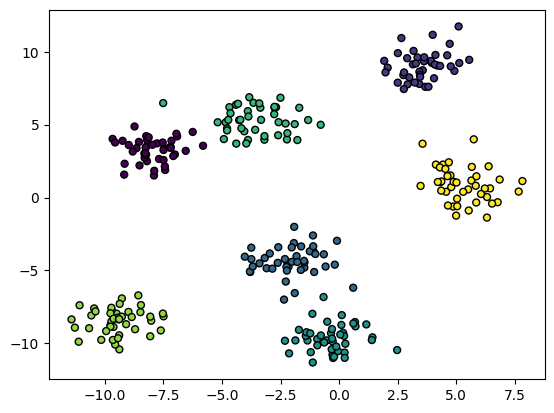

In [38]:
data, data_y = make_blobs(n_samples=300, n_features=5, centers = 7, random_state=110)
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")

Внешняя метрика RAND SCORE: 0.9510144927536232
Внешняя метрика Adjusted Rand Index: 0.815076679628975
Внутреняя метрика силуэт: 0.5657237700794934
Внутреняя метрика davies_bouldin_score: 0.7936876915658805


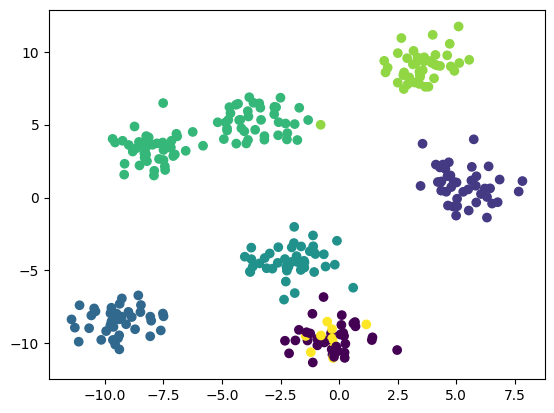

In [53]:
kmeans = KMeans(7).fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans)
print(f"Внешняя метрика RAND SCORE: {rand_score(kmeans, data_y)}")
print(f"Внешняя метрика Adjusted Rand Index: {adjusted_rand_score(kmeans, data_y)}")
print(f"Внутреняя метрика силуэт: {silhouette_score(data, kmeans)}")
print(f"Внутреняя метрика davies_bouldin_score: {davies_bouldin_score(data, kmeans)}")

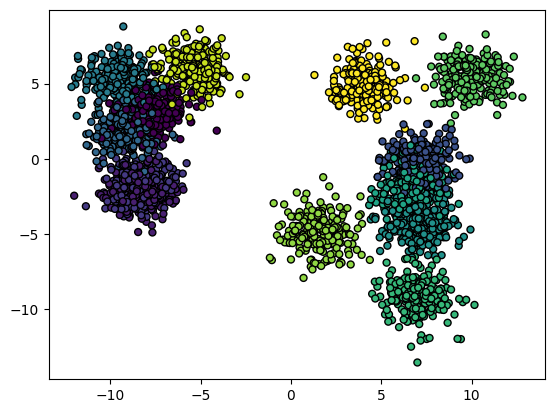

In [2]:
data, data_y = make_blobs(n_samples=3000, n_features=9, centers = 13, random_state=110)
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")

Внешняя метрика RAND SCORE: 0.9346393242191842
Внешняя метрика Adjusted Rand Index: 0.24127849710518287
Внутреняя метрика силуэт: 0.08640530582527013
Внутреняя метрика davies_bouldin_score: 2.0701290680000213


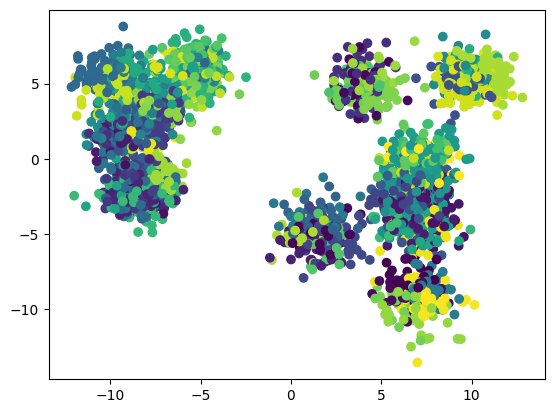

In [4]:
kmeans = KMeans(13).fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans)
print(f"Внешняя метрика RAND SCORE: {rand_score(kmeans, data_y)}")
print(f"Внешняя метрика Adjusted Rand Index: {adjusted_rand_score(kmeans, data_y)}")
print(f"Внутреняя метрика силуэт: {silhouette_score(data, kmeans)}")
print(f"Внутреняя метрика davies_bouldin_score: {davies_bouldin_score(data, kmeans)}")

In [32]:
def pca(X, num_components):
    # Центрирование данных
    X_meaned = X - np.mean(X, axis=0)
    
    # Вычисление ковариационной матрицы
    cov_matrix = np.cov(X_meaned, rowvar=False)
    
    # Вычисление собственных значений и собственных векторов
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    
    # Сортировка собственных значений в убывающем порядке
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    
    # Выбор нужного числа главных компонент
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Проецирование данных на главные компоненты
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    
    return X_reduced

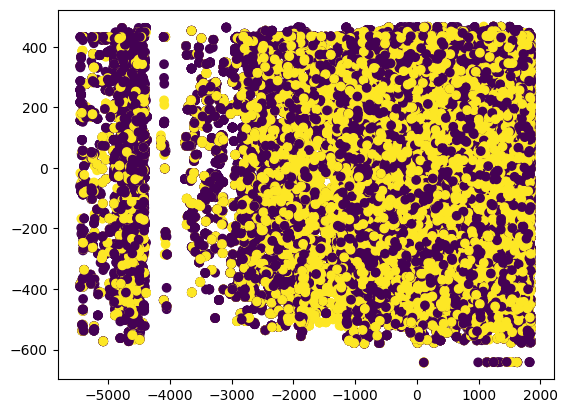

In [33]:
df_classification = pd.read_csv('D:/ML/data/classification/airlines_task_preprocessed.csv', index_col=0)
y_cf = df_classification["Delay"]
X_cf = df_classification.drop(["Delay"], axis=1)
X_cf = pca(X_cf, 2)
plt.scatter(X_cf[:,0], X_cf[:,1], c=y_cf);

In [7]:
kmeans = KMeans(2).fit(X_cf)
print(f"Внешняя метрика RAND SCORE: {rand_score(kmeans, y_cf)}")
print(f"Внешняя метрика Adjusted Rand Index: {adjusted_rand_score(kmeans, y_cf)}")
print(f"Внутреняя метрика силуэт: {silhouette_score(X_cf, kmeans)}")
print(f"Внутреняя метрика davies_bouldin_score: {davies_bouldin_score(X_cf, kmeans)}")

Внешняя метрика RAND SCORE: 0.5059127060562698
Внешняя метрика Adjusted Rand Index: -0.008193639917760587
Внутреняя метрика силуэт: 0.6081827341866645
Внутреняя метрика davies_bouldin_score: 0.6062731020286635


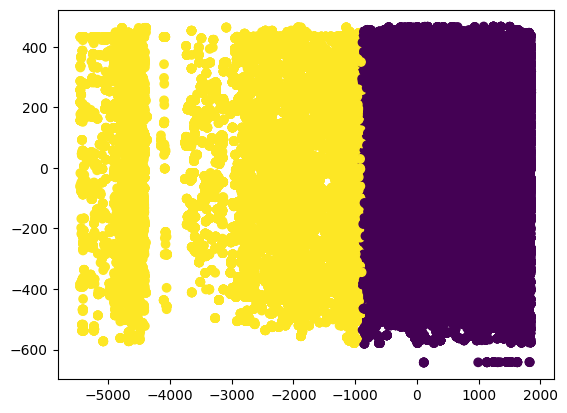

In [8]:
plt.scatter(X_cf[:,0], X_cf[:,1], c=kmeans);

In [15]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Количество объектов классов: 0 и 1 после андерсемплинга Counter({0: 54392, 1: 54392})


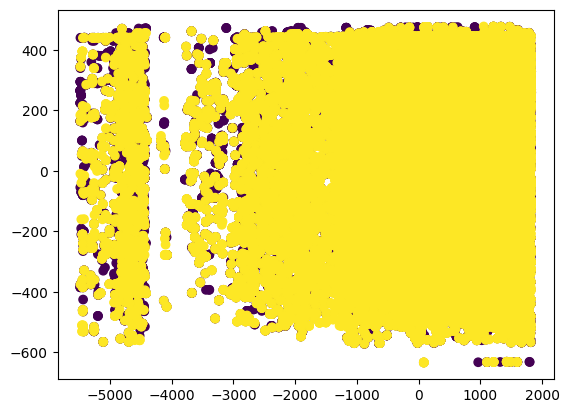

In [16]:
df_classification = pd.read_csv('D:/ML/data/classification/airlines_task_preprocessed.csv', index_col=0)
y_cf = df_classification["Delay"]
X_cf = df_classification.drop(["Delay"], axis=1)
underSampler = RandomUnderSampler(random_state=42)
X_under_sample, y_under_sample = underSampler.fit_resample(X_cf,y_cf)
print(f"Количество объектов классов: 0 и 1 после андерсемплинга {Counter(y_under_sample)}")
X_under_sample = pca(X_under_sample, 2)
plt.scatter(X_under_sample[:,0], X_under_sample[:,1], c=y_under_sample);

In [17]:
kmeans = KMeans(2).fit(X_under_sample)
print(f"Внешняя метрика RAND SCORE: {rand_score(kmeans, y_under_sample)}")
print(f"Внешняя метрика Adjusted Rand Index: {adjusted_rand_score(kmeans, y_under_sample)}")
print(f"Внутреняя метрика силуэт: {silhouette_score(X_under_sample, kmeans)}")
print(f"Внутреняя метрика davies_bouldin_score: {davies_bouldin_score(X_under_sample, kmeans)}")

Внешняя метрика RAND SCORE: 0.5007393042918941
Внешняя метрика Adjusted Rand Index: 0.0014813191852565278
Внутреняя метрика силуэт: 0.6004170717956796
Внутреняя метрика davies_bouldin_score: 0.6202181578351785


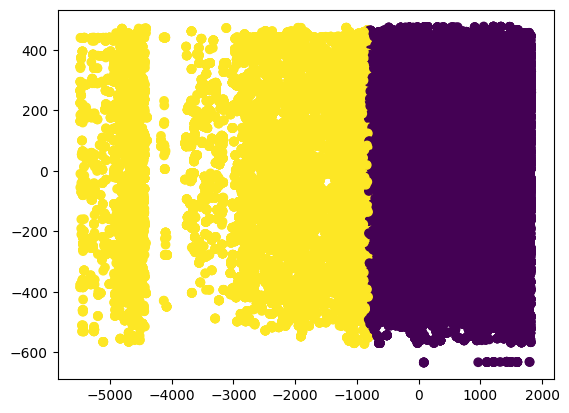

In [19]:
plt.scatter(X_under_sample[:,0], X_under_sample[:,1], c=kmeans);

In [24]:
from sklearn.decomposition import PCA
df_classification = pd.read_csv('D:/ML/data/classification/airlines_task_preprocessed.csv', index_col=0)
y_cf = df_classification["Delay"]
X_cf = df_classification.drop(["Delay"], axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cf, y_cf)

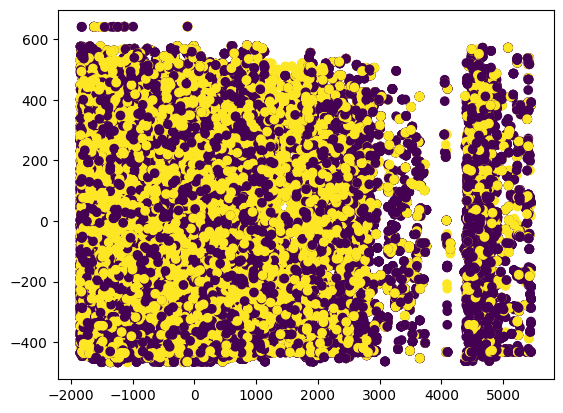

In [25]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_cf);